# Exercise sheet 11 - Parallelisation

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import time 

# Exercise 1 - Rigged dice

Create a rigged dice function that 25% of the time returns the number 6. The rest of the time it returns the integers 1,2,3,4,5 uniformly.
Test your function, by calling it **one billion times** (10^9) and checking that 6 is returned in the range of 249-251 million (inclusive) times. You do not need to check that numbers 1 to 5 are returned uniformly or randomly, but you need to check that your function returns integers in the range 1-6 (inclusive). **Time** how long it takes to run the script.

Now attempt to **parallelise the task with a method of your own choosing** and time how long it takes once more. How does this compare to the previous *un-optimised* run?


In [8]:
import random 

start = time.time() 

def rigid_dice(): 
    if random.random() < 0.25: 
        return 6 # generate random number between 0 and 1. If its smaller than 0.25 (so 25 %), it gives out 6. random.random gives a float between 0 and 1 
    else: 
        return random.randint(1,5) # else the code gives a random number between 1 and 5 
   
results = [] 

for i in range(10**9): 
    results.append(rigid_dice())
    
counts = [results.count(i) for i in range(1,7)]

plt.bar(range(1, 7), counts, color = 'blue')
plt.xlabel("dice numbers")
plt.ylabel("frequency")
plt.show()

percentages = [round((results.count(i) /100000) * 100, 2) for i in range(1, 7)]
print( "percentages for dice numbers:[1, 2, 3, 4, 5, 6]", percentages)

end = time.time() 

print("runtime in seconds:", end - start)

KeyboardInterrupt: 

This code is so slow, it is not even capable of providing an output. It still works good for 10^5, but 10^9 is way to big. 

In [9]:
N = 10**9
p_six = 0.25

start = time.time()

# Anzahl der Sechsen direkt ziehen
six_count = np.random.binomial(N, p_six)

# Restliche Würfe (1–5)
other_count = N - six_count

end = time.time()

print("6 rolled:", six_count)
print("Other rolls:", other_count)
print("Runtime (s):", end - start)

# Checks
assert 249_000_000 <= six_count <= 251_000_000
assert six_count + other_count == N

6 rolled: 249977196
Other rolls: 750022804
Runtime (s): 0.0


# Exercise 2 - Calculate $\pi$

Using the **DSMC method**, calculate the value of **$\pi$**.


**Approach:**
In order to do this, create a 2-dimensional domain (defined by the coordinates $x_{min}, x_{max}, y_{min}, y_{max}$) and launch a number P of particles at random locations within. Check which particles lie inside a circle with radius $$ \frac{x_{max}-x_{min}}{2}, $$ where $x_{min}, x_{max}$ are the x-limits of your 2D domain. 

Get your value for $\pi$ by using the following formula:
$$\pi = \frac{4 \cdot n_{inside}}{P},$$ where $n_{inside}$ is the number of particles inside the circle and $P$ is the total number of particles.

Play around with the number of particles. 

**a)** Try to improve this task by making use of threading (you can use either the **_thread** or **threading** module). What are your findings, is the script running faster? 

**b)** Now try to improve the running time of the code by employing the **multiprocessing** module. Are there any differences as compared to threading?

In [3]:
# Number of Particles 
P = 10000000

# Random position (equally distributed inside square -1, 1) for P amount of Particle 
# einzelne Monte-Carlo Estimation with many P 
x = np.random.uniform(-1, 1, P)
y = np.random.uniform(-1, 1, P)

# Test whether inside circle 
inside = x**2 + y**2 <= 1.0
n_inside = np.sum(inside)

# Pi estimation (points inside circle/points inside square = pi/4)
pi_est = 4 * n_inside / P

# Error 
pi_err = pi_est - np.pi

print("pi (Monte Carlo) =", pi_est)
print("Error =", pi_err)

pi (Monte Carlo) = 3.14226
Error = 0.000667346410206715


In [10]:
import random 
import math

def estimate_pi(P):
    n_inside = 0

    for _ in range(P):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)

        if x*x + y*y <= 1.0:
            n_inside += 1

    return 4 * n_inside / P


# ---- run simulation ----
P = 10_000_000

start = time.time()
pi_est = estimate_pi(P)
end = time.time()

print("Estimated pi:", pi_est)
print("Error:", abs(pi_est - math.pi))
print("Runtime (s):", end - start)


Estimated pi: 3.1414784
Error: 0.00011425358979311184
Runtime (s): 7.020660161972046


In [11]:
import random 
import math
import threading

def worker(n_samples, results, idx):
    count = 0
    for _ in range(n_samples):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        if x*x + y*y <= 1.0:
            count += 1
    results[idx] = count


P = 10_000_000
n_threads = 4
samples_per_thread = P // n_threads

results = [0] * n_threads
threads = []

start = time.time()

for i in range(n_threads):
    t = threading.Thread(
        target=worker,
        args=(samples_per_thread, results, i)
    )
    threads.append(t)
    t.start()

for t in threads:
    t.join()

n_inside = sum(results)
pi_est = 4 * n_inside / P

end = time.time()

print("Estimated pi:", pi_est)
print("Error:", abs(pi_est - math.pi))
print("Runtime (s):", end - start)


Estimated pi: 3.1417096
Error: 0.00011694641020687513
Runtime (s): 7.314939737319946


In [ ]:
import random
import time
import math
import multiprocessing as mp

def worker(n_samples):
    count = 0
    for _ in range(n_samples):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        if x*x + y*y <= 1.0:
            count += 1
    return count


if __name__ == "__main__":
    P = 10_000_000
    n_proc = mp.cpu_count()
    samples_per_proc = P // n_proc

    start = time.time()

    with mp.Pool(n_proc) as pool:
        results = pool.map(worker, [samples_per_proc] * n_proc)

    n_inside = sum(results)
    pi_est = 4 * n_inside / P

    end = time.time()

    print("CPU cores used:", n_proc)
    print("Estimated pi:", pi_est)
    print("Error:", abs(pi_est - math.pi))
    print("Runtime (s):", end - start)


Threading doesnt really improve the time. Unlike threading, multiprocessing bypasses Python’s Global Interpreter Lock by spawning separate processes, each with its own interpreter. 

# Exercise 3 - Mandelbrot fractals

Read about the Mandelbrot set: https://en.wikipedia.org/wiki/Mandelbrot_set. 
This set is defined by repeatedly applying this recurrence:

$z_{n+1} = z_{n}^2 + c$,

which starts with $z_{0} = 0$ for a given complex number $c$ (each pixel corresponds to one $c$). The idea is to check if a particle "escapes" at a certain iteration. At each iteration, one checks if the sequence $z_0, z_1, ... z_n$ growing or stays bound. The growing condition: $|z_n| > 2$. If the condition ```if (z.real*z.real + z.imag*z.imag) > 4``` is fulfilled at any step, we mark the particle as "escaped". If the sequence stays bound forever (never uncontrollably grows for a given number of iterations, for instance, 300), then it is inside the the Mandelbrot set.

**(A)** Create a script which visualizes the Mandelbrot set. The X-axis is the real part of the complex number, the Y-axis is the imaginary part. You can use the colorscheme of your choice. Mark the particles which never escape as one color, and color the escaped particles based on how fast they escaped (that is, use the iteration at which they escaped for your colorbar). You should define the width and height of your image (for instance, 1000 and 700, but you can change it if you like), and 

**(B)** Parallelize your Mandelbrot function using the *multiprocessing* module. Experiment with different sizes of datachunks you give separate processors (you can split the data by column chunks or row chunks and process them separately in separate processes).



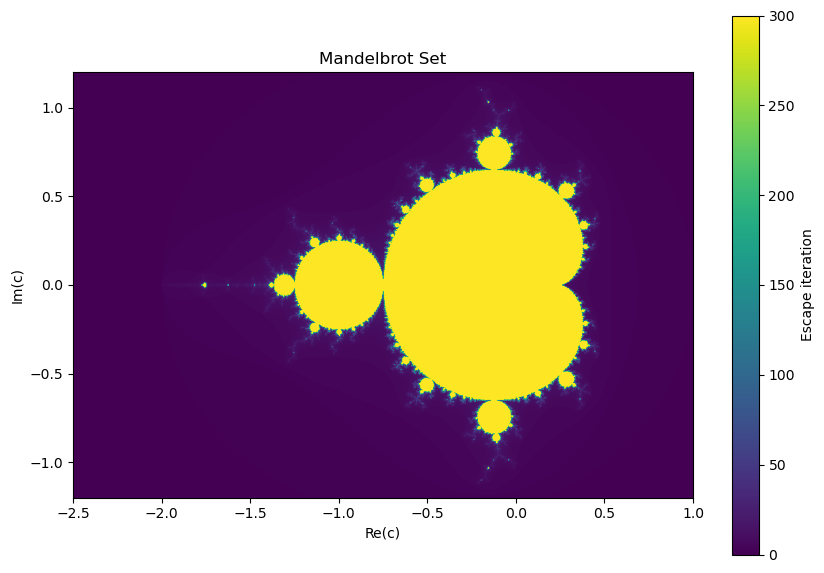

In [3]:
width = 1000      # Bildbreite (Pixel)
height = 700      # Bildhöhe (Pixel)
max_iter = 300    # Maximale Iterationen

# complex ebene 
xmin, xmax = -2.5, 1.0
ymin, ymax = -1.2, 1.2

# complex numbers 
x = np.linspace(xmin, xmax, width)
y = np.linspace(ymin, ymax, height)

# result array 
mandelbrot = np.zeros((height, width))

# Mandelbrot calculation 
for i in range(height):
    for j in range(width):
        c = complex(x[j], y[i])
        z = 0 + 0j
        escaped = False

        for n in range(max_iter):
            z = z*z + c
            if (z.real*z.real + z.imag*z.imag) > 4:
                mandelbrot[i, j] = n
                escaped = True
                break

        if not escaped:
            mandelbrot[i, j] = max_iter  # Mandelbrot-Set

plt.figure(figsize=(10, 7))
plt.imshow(
    mandelbrot,
    extent=[xmin, xmax, ymin, ymax],
    cmap="viridis",
    origin="lower"
)
plt.colorbar(label="Escape iteration")
plt.xlabel("Re(c)")
plt.ylabel("Im(c)")
plt.title("Mandelbrot Set")
plt.show()